# Import Libary

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score, precision_score, recall_score, f1_score

# Data Loading

In [30]:
# load the dataset
heart = pd.read_csv('heart_disease.csv')
heart

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


# Data Understanding

In [31]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [32]:
heart.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [33]:
# Cek apakah ada nilai duplikat
heart.duplicated().sum()

np.int64(272)

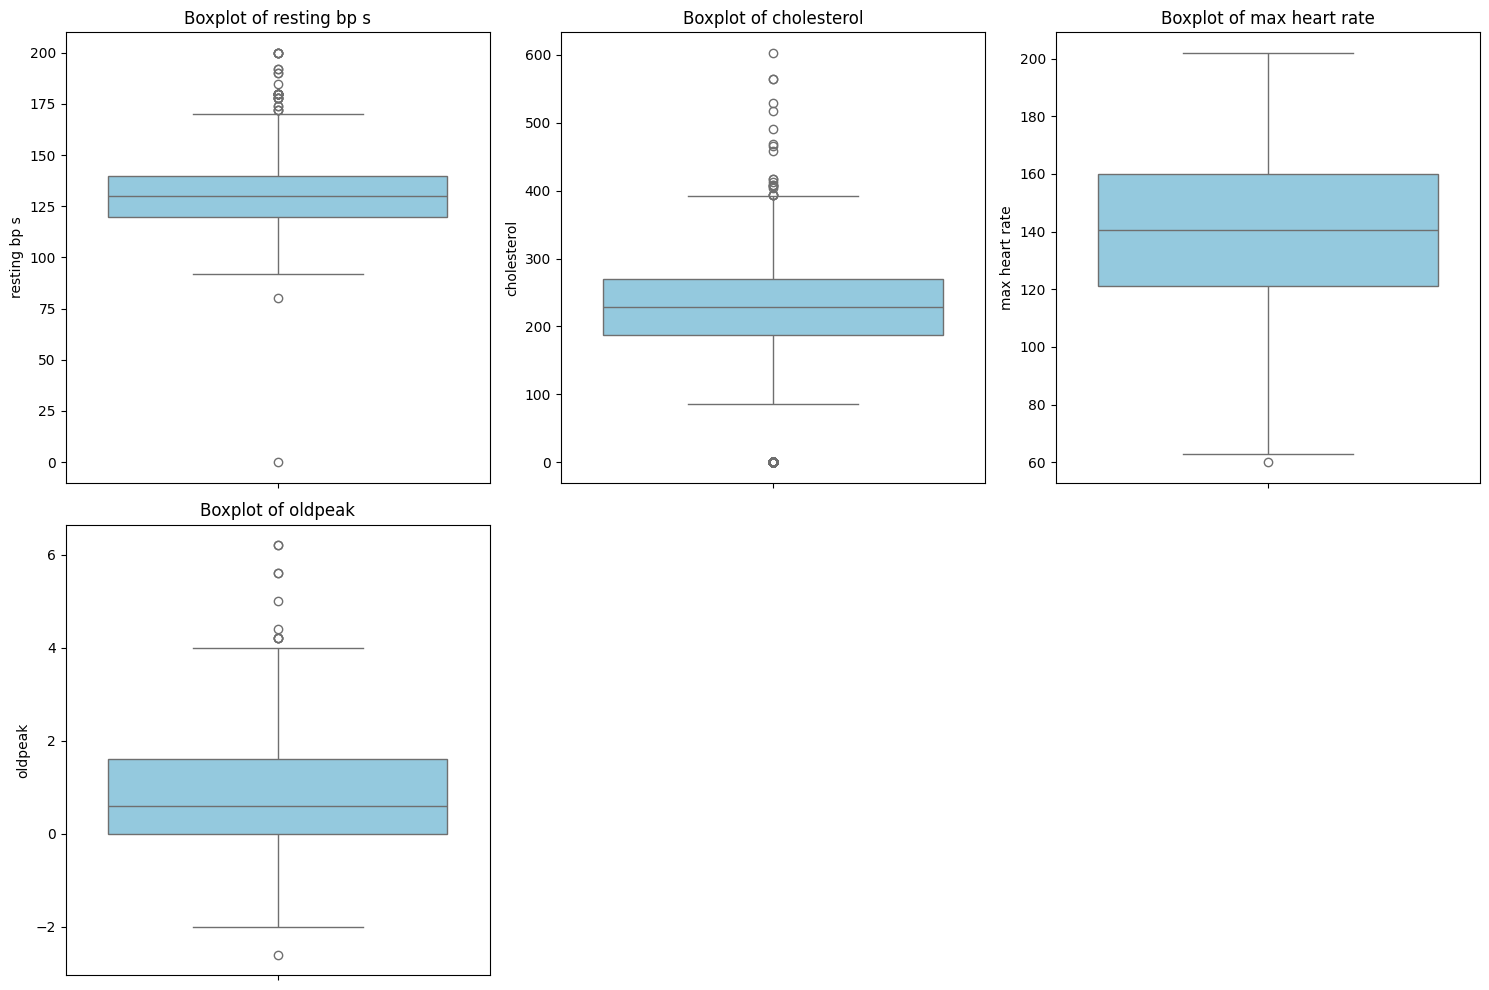

In [34]:
# Memilih fitur-fitur numerik yang rawan outlier
features_to_check = ['resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

# Atur ukuran visualisasi
plt.figure(figsize=(15, 10))

# Buat boxplot untuk tiap fitur
for i, feature in enumerate(features_to_check, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=heart, y=feature, color='skyblue')
    plt.title(f'Boxplot of {feature}')
    plt.tight_layout()

plt.show()


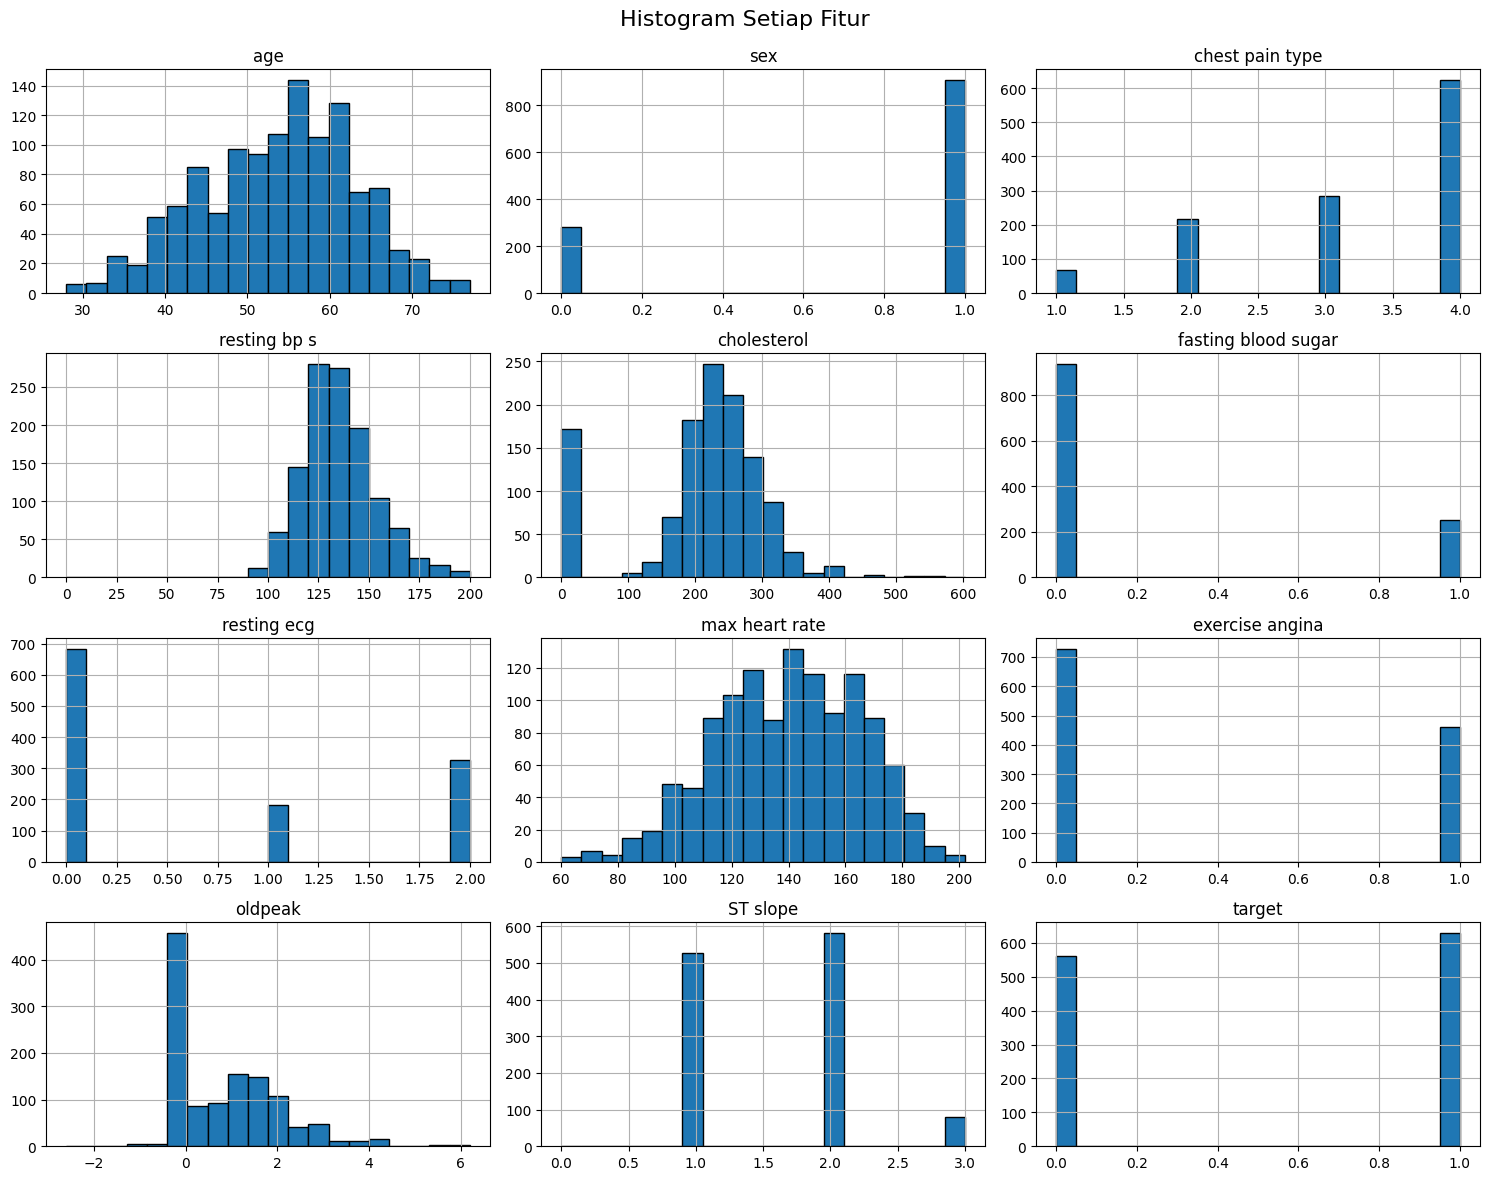

In [35]:
# Univariate Analysis
df_numeric = heart.select_dtypes(include=['int64', 'float64'])
df_numeric.hist(figsize=(15, 12), bins=20, edgecolor='black')
plt.suptitle("Histogram Setiap Fitur", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

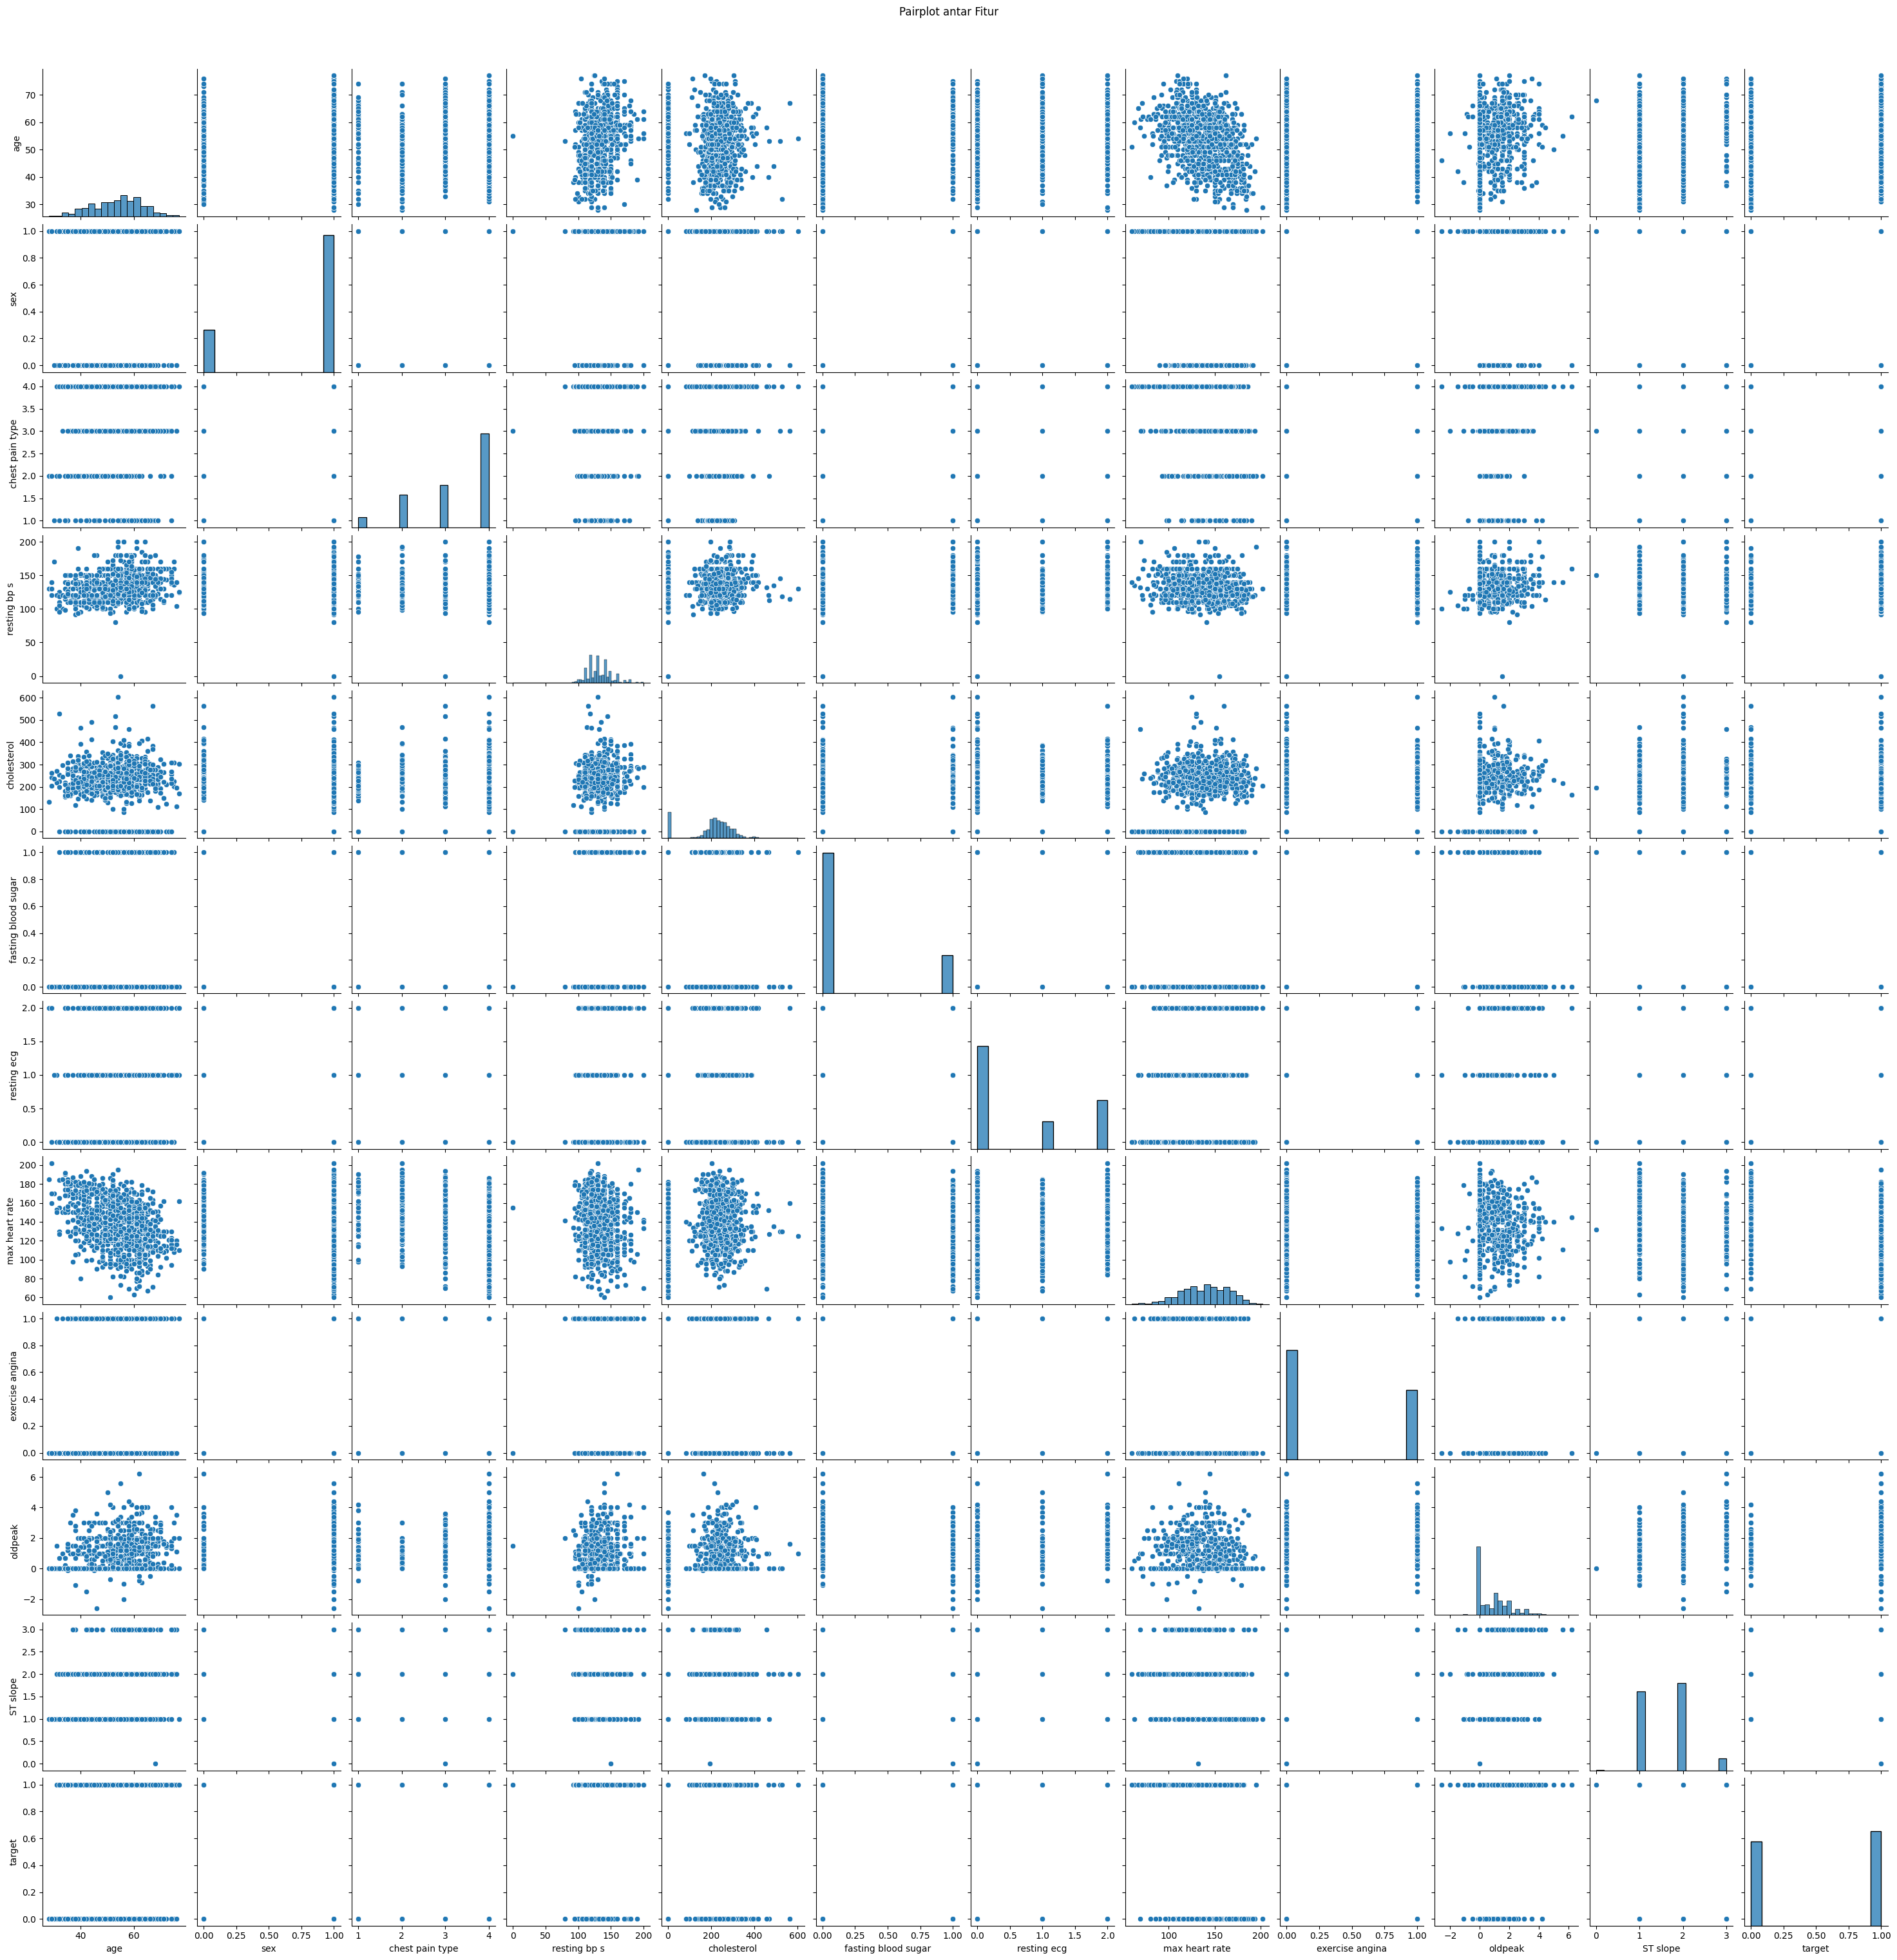

In [36]:
# Multivariate Analysis
sns.pairplot(df_numeric)
plt.suptitle("Pairplot antar Fitur", y=1.02)
plt.show()

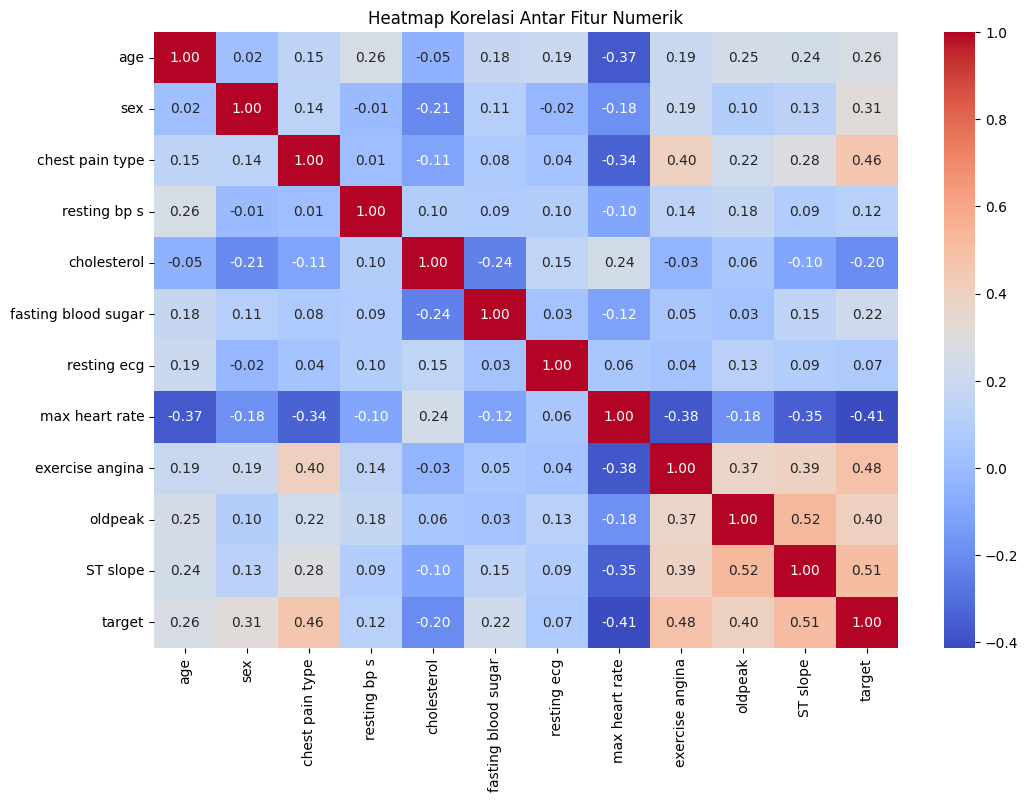

In [37]:
# Heatmap Korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap Korelasi Antar Fitur Numerik")
plt.show()

# Data Preparation

In [38]:
# Menghapus nilai duplikat
heart = heart.drop_duplicates()
heart.duplicated().sum()

np.int64(0)

In [39]:
# Menangani Outlier
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Kolom yang ingin dibersihkan dari outlier
outlier_cols = ['resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
heart = remove_outliers_iqr(heart, outlier_cols)


In [40]:
heart.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000
mean,52.723252,0.760342,3.144080,131.544936,239.475036,0.162625,0.634807,140.573466,0.373752,0.829244,1.560628,0.462197
std,9.542111,0.427179,0.956517,15.428074,50.338211,0.369287,0.838801,24.370341,0.484144,0.959398,0.583919,0.498925
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,71.000000,0.000000,-0.100000,0.000000,0.000000
25%,46.000000,1.000000,2.000000,120.000000,206.000000,0.000000,0.000000,122.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,3.000000,130.000000,235.000000,0.000000,0.000000,140.000000,0.000000,0.400000,2.000000,0.000000
75%,59.000000,1.000000,4.000000,140.000000,272.000000,0.000000,1.000000,160.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,4.000000,170.000000,394.000000,1.000000,2.000000,202.000000,1.000000,3.600000,3.000000,1.000000


In [41]:
# Split Dataset dan Cek Jumlah Sampel
X = heart.drop('target', axis=1)
y = heart['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 701
Total # of sample in train dataset: 560
Total # of sample in test dataset: 141


In [42]:
# Melakukan Standarisasi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelling

In [43]:
# Membangun Model Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

In [44]:
# Membangun Model Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [45]:
# Membangun Model Support Vector Machine (SVM)
svm = SVC()
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

# Evaluasi

In [46]:
# Logistic Regression
print("Logistic Regression:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_logreg), 2))
print("Precision:", round(precision_score(y_test, y_pred_logreg), 2))
print("Recall:", round(recall_score(y_test, y_pred_logreg), 2))
print("F1 Score:", round(f1_score(y_test, y_pred_logreg), 2))
print()

# SVM
print("SVM:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_svm), 2))
print("Precision:", round(precision_score(y_test, y_pred_svm), 2))
print("Recall:", round(recall_score(y_test, y_pred_svm), 2))
print("F1 Score:", round(f1_score(y_test, y_pred_svm), 2))
print()

# Random Forest
print("Random Forest:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf), 2))
print("Precision:", round(precision_score(y_test, y_pred_rf), 2))
print("Recall:", round(recall_score(y_test, y_pred_rf), 2))
print("F1 Score:", round(f1_score(y_test, y_pred_rf), 2))
print()


Logistic Regression:
Accuracy: 0.85
Precision: 0.86
Recall: 0.85
F1 Score: 0.86

SVM:
Accuracy: 0.71
Precision: 0.78
Recall: 0.62
F1 Score: 0.69

Random Forest:
Accuracy: 0.89
Precision: 0.89
Recall: 0.91
F1 Score: 0.9

